# Chapter 3: Random Walks and Markov Chains

In this chapter, we'll introduce algorithms that depend on randomization. It turns out that almst all of the most efficient classical algorithms to solve problems use randomness, which might surprise you. 

We'll start with the most basic randomized algorithm, the random (or drunken) walk, which maps to the Markov chain. These (like most physical processes) have no memory, but we'll explore some processes that do have memory. We'll continue with the concept of temperature, and explore the Pauli paramagnet, hopefully complementing what you are learning in statistical mechanics. Finally, we'll look at cellular automata, which are a lot like random walks except not deterministic!

We always start by loading numpy and matplotlib:


# 3.1 Random walks

Let's return to the analysis in Section 2.2.2, where we analyzed the probabilities of getting some number of heads when flipping a coin many times. Imagine now that every time we get heads we move one step to the right, and every time we get tails we move one step to the left; this is the random walker. Then the difference between the total number of heads and tails gives us our position relative to the starting point. Thus, the distribution of probabilities is a spatial representation of the probability distribution of where the random walker will be after some number of steps. Of course, the most likely position is at the center!

It is useful to consider the situation where the number of steps is very large but the step size goes to zero. This transforms the discrete random walk discussed above into a continuous walk. The problem, though, is that when $N$ gets huge, factors like $N!$ and $(N-n)!$ appearing in the binomial distribution above get insanely huge, and it becomes difficult to know what the result is of dividing them. One way to get around the problem is to take the logarithms of both sides, since logs of insanely huge numbers are often tractable large numbers (maybe this is why Boltzmann defined entropy this way? Just to avoid having to calculate large numbers). Here goes:
\begin{eqnarray}
\ln\left[P_N(n_1)\right]&=&\ln\left[{N!\over n_1!(N-n_1)!}p^{n_1}q^{N-n_1}
\right]\nonumber \\
&=&\ln(N!)-\ln(n_1!)-\ln[(N-n_1)!]+n_1\ln(p)+(N-n_1)\ln(q).\nonumber
\end{eqnarray}
Now use Stirling's formula to handle the factorials, $\ln(n!)\approx n\ln(n)-n$ for $n\gg 1$.

One then obtains
$$\ln\left[P_N(n_1)\right]=N\ln(N)-N-n_1\ln(n_1)+n_1-(N-n_1)\ln[(N-n_1)]+N-n_1+n_1\ln(p)+(N-n_1)\ln(q).$$
And so
\begin{equation}
{d\over dn_1}\ln\left[P_N(n_1)\right]=-\ln(n_1)-1+\ln(N-n_1)+1+\ln(p)-\ln(q)
=\ln\left[{N-n_1\over n_1}{p\over q}\right].
\end{equation}
The most probable value} for $n_1$ is designated $\tilde{n}_1$ and is defined by
$${d\over dn_1}\ln\left[P_N(n_1)\right]=0.$$

Using this gives
$${N-\tilde{n}_1\over\tilde{n}_1}{p\over q}=1\quad\mbox{because
$\ln(1)=0$.}$$
Straightforward manipulation gives $\tilde{n}_1=Np=\overline{n_1}$, as expected.

What is the probability $P_N(n_1)$ away from the most probable value
$\tilde{n}_1$? Taylor series around $n_1=\tilde{n}_1$:
$$\ln\left[P_N(n_1)\right]=\ln\left[P_N(\tilde{n}_1)\right]
+\left(n_1-\tilde{n}_1\right){d\over dn_1}
\ln\left[P_N(n_1)\right]_{n_1=\tilde{n}_1}
+{\left(n_1-\tilde{n}_1\right)^2\over 2}{d^2\over dn_1^2}
\ln\left[P_N(n_1)\right]_{n_1=\tilde{n}_1}+\ldots$$
$$\Rightarrow\qquad P_N(n_1)\approx P_N(\tilde{n}_1)
\exp\left\{{\left(n_1-\tilde{n}_1\right)^2\over
2}{d^2\over dn_1^2}\ln\left[P_N(n_1)\right]_{n_1=\tilde{n}_1}\right\}.$$
The result above can be used to evaluate the mess in the curly brackets:
$${d^2\over dn_1^2}\ln\left[P_N(n_1)\right]=-{1\over n_1}-{1\over N-n_1}.$$
At $n_1=\tilde{n}_1$,
\begin{eqnarray}
{d^2\over dn_1^2}\ln\left[P_N(\tilde{n}_1)\right]&=&-{1\over Np}-{1\over N-Np}
\nonumber \\
&=&-{1\over Np}-{1\over Nq}\nonumber \\
&=&-{p+q\over Npq}=-{1\over Npq}\nonumber
\end{eqnarray}
So the second derivative is negative, indicating that $n_1=\tilde{n}_1$ is
a maximum. Does this expression look familiar?

So finally one obtains the expression for the probability distribution of a continuous random walk:
\begin{eqnarray}
P_N(n_1)&=&P_N(\tilde{n}_1)\exp\left\{{\left(n_1-Np\right)^2\over 2}
{-1\over Npq}\right\}\nonumber \\
&=&{1\over\sqrt{2\pi(\Delta n_1)^2}}\exp\left\{{-(n_1-\overline{n_1})^2\over
2(\Delta n_1)^2}\right\},
\end{eqnarray}
where the prefactor of the exponential is the normalization constant, since
$$\int dn_1 P_N(n_1)\equiv 1.$$

# 3.1.1 Assignment 4 Problem (20 points): Simulate random walks

**Problem (20 points):** Write a Python code to follow the path of a random walker in one dimension for $N$ steps, where $N$ is large (but where $\sqrt{N}$ is smaller than the total grid size). Store the result and repeat for many walkers to obtain a good sample. Show that the distribution of walker positions is a Gaussian. Calculate the mean width (standard deviation) of the distribution as a function of $N$, and compare with the theoretical results above. 

In [1]:
#import required libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
class random_walk:
    '''
    class to organize random walks, takes no objects
    '''
    def gaussian_random_walk(self, N):
        '''
        attribute that generates gaussian random walks based on the total number of steps per set N
        '''
        pos = N/2
        #steps = [pos]
        steps = []
        for j in range(100000):
            #where j range is the total amount of walks performed
            pos = N/2
            for i in range(1,N+1):
                #print(np.random.randint(-1,2))
                x = np.random.choice([-1,1])
                pos = pos + x
            steps.append(pos)
        #print(steps)
        unique, counts = np.unique(steps, return_counts=True)
        #map values
        step_frequency = dict(zip(unique, counts))
        #create graph
        plt.figure(figsize=(15,13))
        plt.ylabel("step frequency")
        plt.xlabel("position on 1 dimensional grid")
        plt.xlim(0,N)
        plt.bar(list(step_frequency.keys()), step_frequency.values(), color='g')
        plt.show()
    def observed_random_walk_std(self,N):
        '''
        Attribute that calculates the standard deviation of the gaussian above
        '''
        pos = N/2
        #steps = [pos]
        steps = []
        for j in range(1000):
            pos = N/2
            for i in range(1,N+1):
                #print(np.random.randint(-1,2))
                x = np.random.choice([-1,1])
                pos = pos + x
            steps.append(pos)
        return np.std(steps)
    def theoretical_random_walk_std(self,N,p):
        '''
        N is a numpy array, int or float
        p is the a probability
        theoretical probability based on 1D random walk from wolfram alpha
        '''
        q = 1-p
        return np.sqrt(N*p*q)    

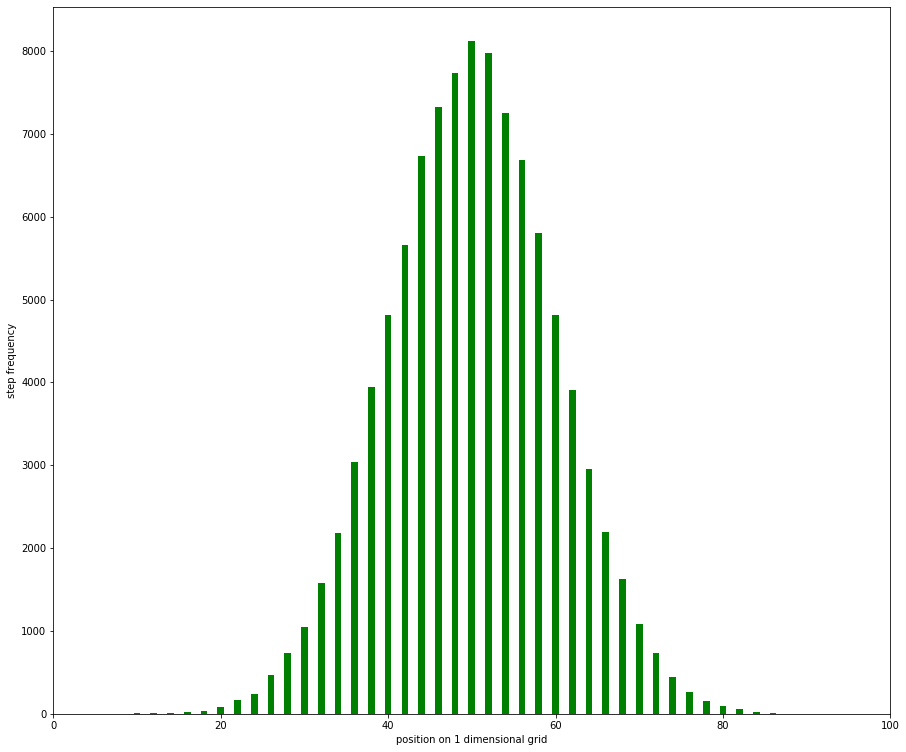

The observed standard deviation is 9.951783759708608
 
The theoretical standard deviation is 5.0


In [3]:
#generate Gaussian as requested
N = 100

random_walk().gaussian_random_walk(N)
print('The observed standard deviation is', random_walk().observed_random_walk_std(N))
print(" ")
print('The theoretical standard deviation is', random_walk().theoretical_random_walk_std(N,0.5))

In [4]:
random_walk().observed_random_walk_std(100)

10.274706808469038

In [5]:
#std_scaling function

def std_scaling(N, steps, p = 0.5):
    
    N = np.arange(0,N+steps,steps)
    Th_N_range = np.linspace(N.min(),N.max(),1000)
    
    std_theoretical = random_walk().theoretical_random_walk_std(Th_N_range,p)
    std_observed = []
    
    
    for i in N:
        #print(i)
        x = random_walk().observed_random_walk_std(i)
        #print(x)
        std_observed.append(x)

    std_observed = np.array(std_observed)
    
    #std_theoretical = random_walk().theoretical_random_walk_std(N,p)
    
    spl = UnivariateSpline(N, std_observed)
    Ns = np.linspace(N.min(), N.max(),1000)
    spl.set_smoothing_factor(12)
    
    legend_vals = ["trendline fitted to the standard deviation points calculated", 'standard deviation points',
                  'theoretical standard deviation']
    plt.figure(figsize=(12,10))
    plt.plot(Ns, spl(Ns), 'b', lw=1, label = legend_vals[0])
    plt.plot(N,std_observed, 'o', label = legend_vals[1])
    plt.plot(Th_N_range,std_theoretical,'r', label = legend_vals[2])
    plt.xlabel("N")
    plt.ylabel("standard deviation of N")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.show()

    return "The desired graphs are above"

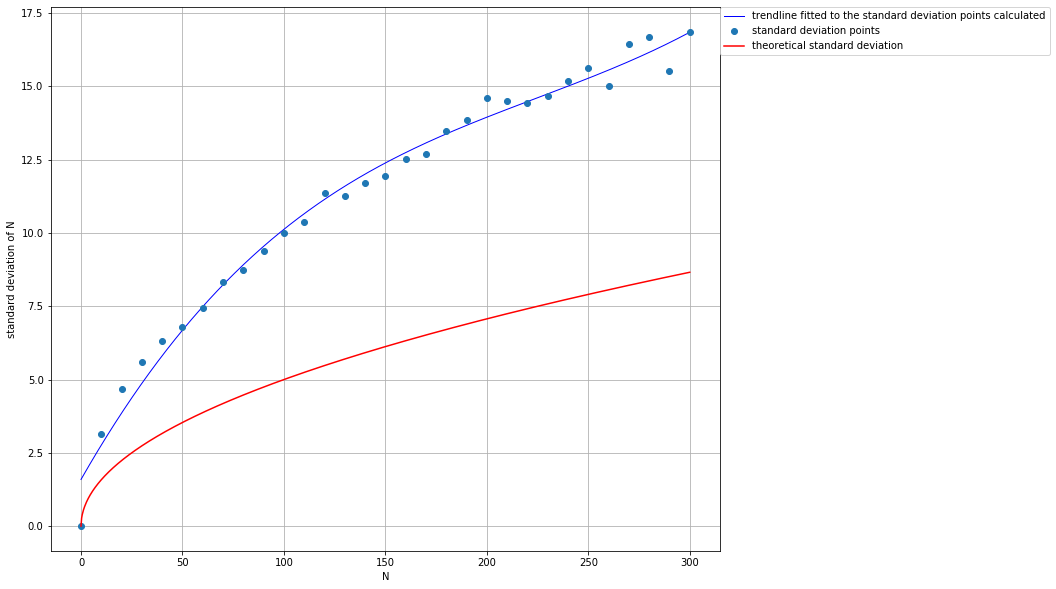

In [6]:
std_scaling(300, 10)

legend_vals = ["trendline fitted to the standard deviation points calculated", 'standard deviation points',
                  'theoretical standard deviation points']

## Discussion 

In response too: 

**Write a Python code to follow the path of a random walker in one dimension for $N$ steps, where $N$ is large (but where $\sqrt{N}$ is smaller than the total grid size). Store the result and repeat for many walkers to obtain a good sample. Show that the distribution of walker positions is a Gaussian. Calculate the mean width (standard deviation) of the distribution as a function of $N$, and compare with the theoretical results above.**

It was shown the random walker walks in a 1 Dimension in a Gaussian distribution; as well as the observed and theoretical standard deviations were calculated and displayed. The standard deviaitons of the gaussian; both observed and theoretical we're then scaled as shown in the figure above. It can be seen they scale to $N^{1/2}$, however the observed standard deviation is always twice as big as the theoretical standard devation. 


# 3.1.2 Connection to the diffusion equation

The continuous random walk discussed above assumes that space is continuous, but the number of steps taken $N$ is still discrete. We can think of the number of steps as being equivalent to time: each step takes a certain amount
of time, after all! What does the random walk look like when both space and time are continuous? If the probability of hopping left or right is the same, then the probability of being at the site $m$ on the $n$th step, $P_n(m)$, satisfies the equation
$$P_{n+1}(m)=\frac{1}{2}P_n(m-1)+\frac{1}{2}P_n(m+1).$$
So we also know that
\begin{equation}
P_{n+1}(m)-P_n(m)=\frac{1}{2}P_n(m-1)+\frac{1}{2}P_n(m+1)-P_n(m).
\end{equation}
If the distance travelled is $x=ma$ with $a$ the stepsize, and the elapsed time is $t=n\tau$ with $\tau$ the time needed to make a step, then we can convert this discrete equation to a continuous equation when $a\to 0$ and $\tau\to 0$, and the probability $P_n(m)$ is transformed into $P(x,t)$. To make further progress we need to remember how derivatives are defined:
$$\frac{\partial P(x,t)}{\partial t}\equiv\lim_{\tau\to 0}
\frac{P(x,t+\tau)-P(x,t)}{\tau},$$
and
$$\frac{\partial^2 P(x,t)}{\partial x^2}\equiv\lim_{a\to 0}
\frac{P(x+a,t)+P(x-a,t)-2P(x,t)}{a^2}.$$
Comparison of these expressions with the probability difference equation gives
$$\tau\frac{\partial P(x,t)}{\partial t}=\frac{a^2}{2}
\frac{\partial^2 P(x,t)}{\partial x^2}$$
or alternatively
$$\frac{\partial P(x,t)}{\partial t}=D\frac{\partial^2 P(x,t)}{\partial x^2}$$
where the diffusion constant $D\equiv a^2/2\tau$. Thus, diffusion of a gas is exactly the same as the gas doing a random walk! We'll explore the diffusion equation more in Chapter 6.

# 3.2 Markov Chains

A key property of the random walk is that the evolution of the walker on the next step only depends (randomly) on the state at the current step. This is known as memorylessness. This memorylessness is the key ingredient of a Markov chain, which generalizes the physical space of the random walker to an abstract discrete (or at least countable) space of possible outcomes.

Let's return for the moment to the random walk on $N$ sites of a one-dimensional lattice. We can encode the probabilities on these sites by a vector ${\bf p}=(p_1,p_2,\ldots,p_N)$. On each step, this vector is acted on by a transition matrix $T$ that encodes the probabilities of the walker moving to another site. For example, when $N=5$ and the lattice has periodic boundary conditions, the transition matrix is
$$T=\begin{pmatrix}
0 & \frac{1}{2} & 0 & 0 & \frac{1}{2}\cr
\frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\cr
0 & \frac{1}{2} & 0 & \frac{1}{2} & 0\cr
0 & 0 & \frac{1}{2} & 0 & \frac{1}{2}\cr
\frac{1}{2} & 0 & 0 & \frac{1}{2} & 0\cr
\end{pmatrix}.
$$
A crucial property of $T$ is that $\sum_iT_{ij}=1$ for all $j$, i.e. the sum of rows and columns must add to unity, otherwise the total probability is not conserved.

The Markov chain generalizes the random walk to any choice of finite-dimensional $T$, subject to the condition above. Now, the 'sites' are vertices of some general network, which could represent physical quantities. See for example the three-site Markov chain for economics in the wikipedia article, with vertices labeled 'Bull market,' 'Bear market,' and 'Stagnant market.' The Markov evolution corresponds to ${\bf p}(t+1)=T{\bf p}(t)$. Thus, the probability after $m$ steps is governed entirely by $T^m$, and there is no need to calculate the probability distribution at every intervening step. Note now that the evolution (or the probabilities) is apparently deterministic, in that no explicit randomness is required; rather, there is a rule for how the occupation of a site changes at each step (and for a random walk that rule only depends on nearest neighbours). See the connection to cellular automata? How about the connection to shuffling?

# 3.2.1 Assignment 4 Problems (60 points): Random Walk as Markov Chain

**Problem (10 points):** Using the transition matrix approach for a sufficiently large $N$, write a program to generate the probability distribution for a random walk on a one-dimensional lattice with periodic boundary conditions after many steps, and compare with the results in Problem 3.1.1.

One common question around Markov chains is to determine if the system goes to a steady / stationary state, i.e. where the probability doesn't change from one timestep to the next. This happens for the three-site economics Markov chain in the wikipedia article, for example. 

**Problem (20 points):** Determine computationally (by effecting a series of matrix multiplications), for small values of $3\leq N < 20$ ($N$ odd), if the one-dimensional random walk Markov chain has a steady state limit. If so, how does the time to reach steady state depend on $N$? Why didn't I ask you to consider even $N$?

There is another way to solve the problem above. If we diagonalize $T$, then it can be represented as 
$$T=U\Lambda U^T,$$
where $\Lambda$ is the diagonal matrix of eigenvalues of $T$, and $U$ is a unitary transformation related to the eigenvectors (I'm writing $U^T$ as the conjugate transpose of $U$ because the Python notebook can't seem to represent the dagger). Because $UU^T=U^TU=I$ (the identity matrix), we immediately have
$$T^m=U\Lambda^mU^T.$$
Any entries with eigenvalues of $T$ larger than unity will blow up (and the system will have a run-away behaviour), and any entries with eigenvalues less than unity will disappear. So, to know if there is a steady state / stationary distribution, it suffices to diagonalize the transition matrix, take the limits, and then apply the unitary matrices.

**Problem (10 points):** For small values of $3\leq N < 20$, diagonalize $T$, take the limit $m\to\infty$ on the eigenvalue matrix, and apply the unitary transformation to obtain the steady-state distribution for the one-dimensional random walk, if there is one. Compare with the results above.

**Problem (20 points):** 

Finally, the $T$ matrix for the 1D random walk can be diagonalized analytically. Suppose we write 
$$p_i=A\cos(kx_i)+B\sin(kx_i).$$


$$ x_i = i  $$ conceptual wise
The values of $A$, $B$, and $k$ are determined (in part!) by satisfying the periodic boundary conditions
$$p_{i+N}=A\cos[k(x_i+Na)]+B\sin[k(x_i+Na)]\equiv p_i,$$
where $a$ is the lattice spacing. Then the action of the transition matrix on the probabilities is
$$Tp_i=\frac{1}{2}\left\{A\cos[k(x_i+a)]+B\sin[k(x_i+a)]+A\cos[k(x_i-a)]+B\sin[k(x_i-a)]\right\}.$$
Using trigonometric identities solves for the eigenvalues, which are functions of $k$. 


Follow the procedure above to obtain the eigenvalues and eigenvectors analytically for the 1D random walk. Check that these match the numerics above. Use these to obtain an estimate of the time needed to reach a steady state as a function of $N$. Interpret your results.

**Problem (10 points):** Using the transition matrix approach for a sufficiently large $N$, write a program to generate the probability distribution for a random walk on a one-dimensional lattice with periodic boundary conditions after many steps, and compare with the results in Problem 3.1.1.

In [7]:
#Start Q1

"""
This function generates our random walk matrix
Param:
  Size: The sizen n of the nxn matrix
Returns:
  The matrix.
"""
def generateWalkMatrix(size):
  array = []
  for index in range(size):
    row = np.zeros(size)
    left = (index - 1) % size
    right = (index + 1) % size
    row[left] = (1/2)
    row[right] = (1/2)
    array.append(row)
  return np.array(array)

"""
This function does the random walk for a given size of the 1d universe, starting position and iteration.
Param:
  size: size of the 1d universe
  startingPosition: where you start in this 1d universe, must be smaller than size-1.
  iterations: number of iterations of the random walk to go for.
Returns:
  A 1d array reflecting the probabilities of being found at each given location.
"""
def doRandomWalk(size, startingPosition, iterations):
  matrix = generateWalkMatrix(size)
  position = np.zeros(size)
  position[startingPosition] = 1
  for iteration in range(iterations):
    position = np.dot(matrix, position)
  return position

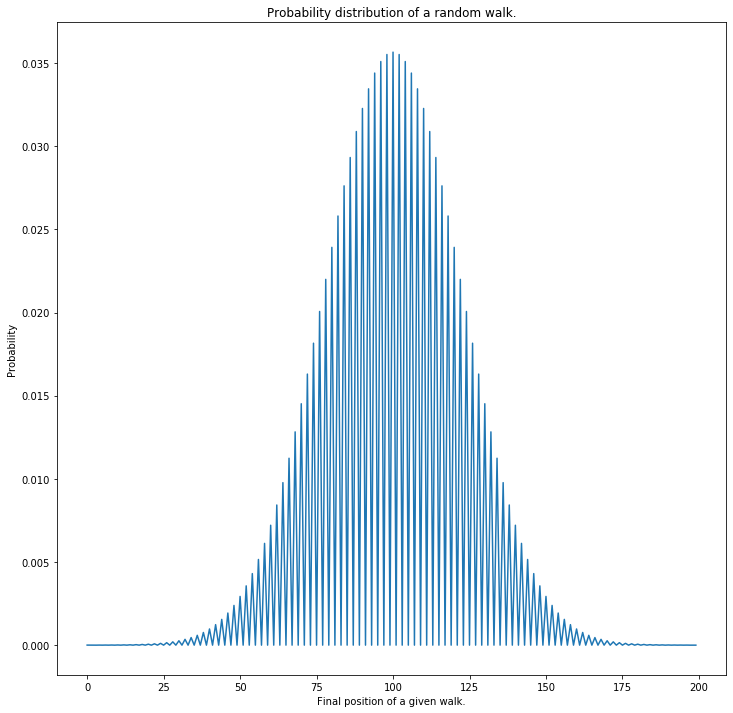

In [8]:

#sanity check
result = doRandomWalk(200, 100, 500)
plt.figure(figsize=(12,12))
plt.plot(range(len(result)), result)
plt.title("Probability distribution of a random walk.")
plt.xlabel("Final position of a given walk.")
plt.ylabel("Probability")
plt.show()
#Going down is due to even/oddness. After n number of steps at x starting point, we get an n + x step solution, so always odd or always even, so the other goes to 0.

Compared to the results we expected from Q1, we got exactly the Gausian for the random walk we wanted. I noticed that if I set the dimensions too small, and the walks too long, it actually evens out to a completely smooth distribution, thanks to the periodic boundary conditions and the redistribution of probabilities. But for a large walk world and steps insufficient to spread the walks across the entire world, we get a nicely shaped Gausian, just like in Question 1.

#### The sharp up-down fluctuations is due to even/oddness. After n number of steps at x starting point, we get an n + x step solution, so always odd or always even, so the other goes to 0.

One common question around Markov chains is to determine if the system goes to a steady / stationary state, i.e. where the probability doesn't change from one timestep to the next. This happens for the three-site economics Markov chain in the wikipedia article, for example. 

**Problem (20 points):** Determine computationally (by effecting a series of matrix multiplications), for small values of $3\leq N < 20$ ($N$ odd), if the one-dimensional random walk Markov chain has a steady state limit. If so, how does the time to reach steady state depend on $N$? Why didn't I ask you to consider even $N$?

In [9]:
#Start part 2
"""
This function, given a 1d universe size and a starting position, 
along with an error tolorance, calculates how many iterations
are needed before it reaches a steady state.
Param:
  N: size of the 1d universe
  startPos: where you start in this 1d universe, must be smaller than size-1.
  epsilon: Error tolorance.
Returns:
  row: An array of what the probability distribution looks like when it ends.
  count: An index of how many iterations it took to get there.
"""
def findSteadyState(N, startPos, epsilon):
  arr = generateWalkMatrix(N)
  row = np.zeros(N)
  oldRow = np.array(row)
  row[startPos] = 1
  count = 0
  
  #print(row)
  #print(oldRow)
  #print(epsilon)
  #print(np.sum(np.abs((row-oldRow))))
  
  while (np.sum(np.abs((row-oldRow))) > epsilon):
    oldRow = np.array(row)
    row = np.dot(arr, row)
    
    #print("---")
    #print(row)
    #print(oldRow)
    #print(epsilon)
    #print(np.sum(np.abs((row-oldRow))))
    
    count += 1
  return row, count

In [10]:
#Doing Q2
epsilon = 10**(-2)
Ns = [N for N in range(3,20,2)]
#print(Ns)
#print(epsilon)
iterCount = []
walks = []
for entry in Ns:
  walk, numIterations = findSteadyState(entry, (entry//2), epsilon)
  iterCount.append(numIterations)
  walks.append(walk)                                    
  
print("The steady state for each of the Ns are:")
for index in range(len(Ns)):
  print("Index: {}".format(Ns[index]))
  print("Steady State: {}".format(walks[index]))
  print("NumIterations: {}".format(iterCount[index]))

numer_counts = iterCount #we'll need this later

The steady state for each of the Ns are:
Index: 3
Steady State: [0.33398438 0.33203125 0.33398438]
NumIterations: 9
Index: 5
Steady State: [0.19959552 0.20105895 0.19869107 0.20105895 0.19959552]
NumIterations: 27
Index: 7
Steady State: [0.1426293  0.14349554 0.14193463 0.14388105 0.14193463 0.14349554
 0.1426293 ]
NumIterations: 54
Index: 9
Steady State: [0.11125406 0.11069951 0.11174173 0.11033755 0.11193432 0.11033755
 0.11174173 0.11069951 0.11125406]
NumIterations: 90
Index: 11
Steady State: [0.09100648 0.0906248  0.09135725 0.09033338 0.09156572 0.09022474
 0.09156572 0.09033338 0.09135725 0.0906248  0.09100648]
NumIterations: 135
Index: 13
Steady State: [0.07685265 0.07713026 0.07659118 0.0773604  0.07640574 0.07749035
 0.07633882 0.07749035 0.07640574 0.0773604  0.07659118 0.07713026
 0.07685265]
NumIterations: 189
Index: 15
Steady State: [0.06661345 0.066824   0.06641209 0.06700735 0.06625476 0.0671318
 0.06616864 0.06717582 0.06616864 0.0671318  0.06625476 0.06700735
 0.06641

As we can see above, each of the odd matrixes has a steady state result which scales, according to the number of steps needed before it hit epsilon, roughly larger than the square of the size of the N. Even values were not considered because after experimenting with them, it was discovered that they never appear to terminate, indicating that they never approach steady state at all. We can verify this with the graph below, where blue is our data and red is the  theoretical squared data.

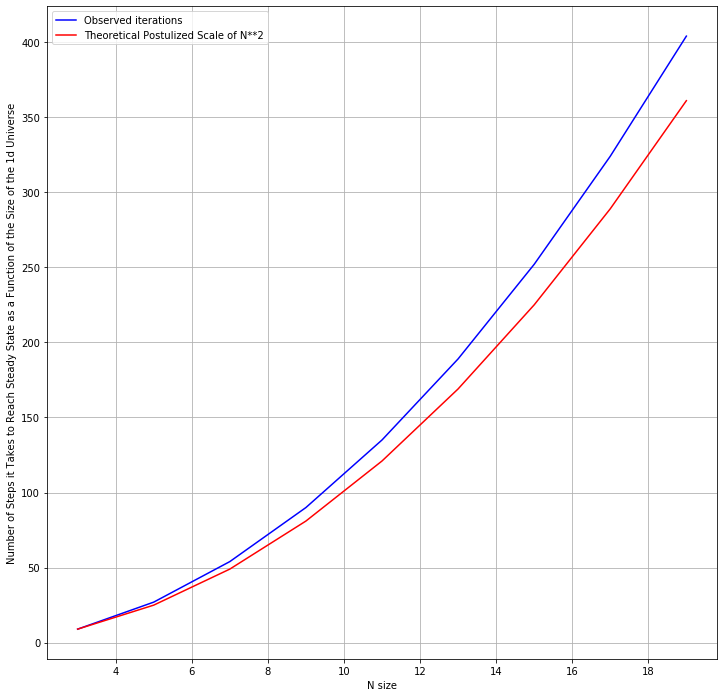

In [11]:
legend = ['Observed iterations', 'Theoretical Postulized Scale of N**2']

plt.figure(figsize = (12,12))
#Graphical comparison
plt.plot(Ns, iterCount, "b", label = legend[0])
plt.plot(Ns, [x**2.00 for x in Ns], "r", label = legend[1])
plt.xlabel("N size")
plt.ylabel("Number of Steps it Takes to Reach Steady State as a Function of the Size of the 1d Universe")
plt.legend()
plt.grid(True)
plt.show()

# plt.plot(Ns, iterCount, "b")
# plt.plot(Ns, [x**2 for x in Ns], "r")
# plt.xlabel("N size")
# plt.ylabel("Num Steps")
# plt.title("Number of Steps it Takes to Reach Steady State as a Function of the Size of the 1d Universe")

To finally verify that the evens will never reach steady state, I modified some of my above code and put it here below. The results I got for just the first even matrix was that it the difference between each step is a full 2.0: that is, each next state is entirely different from the next state; all probabilities move. I believe this is because with each and every step, the probability shifts from each even slot to each odd slot, ending in a state where it shifts between two possible states - all probabilities on even, evenly distributed, or all probabilities on odd spots, evenly distributed, hence the difference 2.0 in probability.

In [12]:
#Doing Q2 for Evens

"""
This function, given a 1d universe size and a starting position, 
along with an error tolorance, calculates how many iterations
are needed before it reaches a steady state.
Param:
  N: size of the 1d universe
  startPos: where you start in this 1d universe, must be smaller than size-1.
  epsilon: Error tolorance.
Returns:
  row: An array of what the probability distribution looks like when it ends.
  count: An index of how many iterations it took to get there.
"""
def findSteadyState(N, startPos, epsilon):
  arr = generateWalkMatrix(N)
  row = np.zeros(N)
  oldRow = np.array(row)
  row[startPos] = 1
  count = 0
  
  #print(row)
  #print(oldRow)
  #print(epsilon)
  #print(np.sum(np.abs((row-oldRow))))
  
  while (np.sum(np.abs((row-oldRow))) > epsilon):
    oldRow = np.array(row)
    row = np.dot(arr, row)
    
    print("---")
    print(row)
    print(oldRow)
    print(epsilon)
    print(np.sum(np.abs((row-oldRow))))
    
    count += 1
    
    if count>600:
        break
  return row, count

epsilon = 10**(-2)
Ns = [N for N in range(10,20,2)]
#print(Ns)
#print(epsilon)
even_iterCount = []
walks = []
for entry in Ns:
  walk, numIterations = findSteadyState(entry, (entry//2), epsilon)
  even_iterCount.append(numIterations)
  walks.append(walk)                                    
  
print("The steady state for each of the Ns are:")
for index in range(len(Ns)):
  print("Index: {}".format(Ns[index]))
  print("Steady State: {}".format(walks[index]))
  print("NumIterations: {}".format(even_iterCount[index]))

---
[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0.01
2.0
---
[0.   0.   0.   0.25 0.   0.5  0.   0.25 0.   0.  ]
[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
0.01
2.0
---
[0.    0.    0.125 0.    0.375 0.    0.375 0.    0.125 0.   ]
[0.   0.   0.   0.25 0.   0.5  0.   0.25 0.   0.  ]
0.01
2.0
---
[0.     0.0625 0.     0.25   0.     0.375  0.     0.25   0.     0.0625]
[0.    0.    0.125 0.    0.375 0.    0.375 0.    0.125 0.   ]
0.01
2.0
---
[0.0625  0.      0.15625 0.      0.3125  0.      0.3125  0.      0.15625
 0.     ]
[0.     0.0625 0.     0.25   0.     0.375  0.     0.25   0.     0.0625]
0.01
2.0
---
[0.       0.109375 0.       0.234375 0.       0.3125   0.       0.234375
 0.       0.109375]
[0.0625  0.      0.15625 0.      0.3125  0.      0.3125  0.      0.15625
 0.     ]
0.01
2.0
---
[0.109375  0.        0.171875  0.        0.2734375 0.        0.2734375
 0.        0.171875  0.       ]
[0.       0.109375 0.       0.234375 0.       0.3125   0.       0.23

2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---

2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.

---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.000000000

---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
0.01
2.0000000000000004
---
[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]
[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]
0.01
2.0000000000000004
---
[0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
0.01
2.0
---
[0.   0.   0.   0.   0.25 0.   0.5  0.   0.25 0.   0.   0.  ]
[0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
0.01
2.0
---
[0.    0.    0.    0.125 0.    0.375 0.    0.375 0.    0.125 0.    0.   ]
[0.   0.   0.   0.   0.25 0.   0.5  0.   0.25 0.   0.   0.  ]
0.01
2.0
---
[0.     0.     0.0625 0.     0.25   0.     0.375  0.     0.25

 0.16667263 0.         0.16666965 0.         0.16666369 0.        ]
[0.         0.16666071 0.         0.16666667 0.         0.16667263
 0.         0.16667263 0.         0.16666667 0.         0.16666071]
0.01
2.0
---
[0.         0.1666622  0.         0.16666667 0.         0.16667114
 0.         0.16667114 0.         0.16666667 0.         0.1666622 ]
[0.16666071 0.         0.16666369 0.         0.16666965 0.
 0.16667263 0.         0.16666965 0.         0.16666369 0.        ]
0.01
2.0
---
[0.1666622  0.         0.16666443 0.         0.1666689  0.
 0.16667114 0.         0.1666689  0.         0.16666443 0.        ]
[0.         0.1666622  0.         0.16666667 0.         0.16667114
 0.         0.16667114 0.         0.16666667 0.         0.1666622 ]
0.01
2.0
---
[0.         0.16666331 0.         0.16666667 0.         0.16667002
 0.         0.16667002 0.         0.16666667 0.         0.16666331]
[0.1666622  0.         0.16666443 0.         0.1666689  0.
 0.16667114 0.         0.1666689  0.    

---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.

 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0

---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.

---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.

---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
0.01
2.0
---
[0.         0.16666667 0.         0.16666667 0.         0.16666667
 0.         0.16666667 0.         0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
0.01
2.0
---
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
[0.         0.16666667 0.         0.16666667

[0.1421083  0.         0.14239025 0.         0.14302378 0.
 0.14353183 0.         0.14353183 0.         0.14302378 0.
 0.14239025 0.        ]
0.01
1.9999999999999996
---
[0.14224927 0.         0.14247814 0.         0.14299241 0.
 0.14340481 0.         0.14340481 0.         0.14299241 0.
 0.14247814 0.        ]
[0.         0.14224927 0.         0.14270701 0.         0.1432778
 0.         0.14353183 0.         0.1432778  0.         0.14270701
 0.         0.14224927]
0.01
2.0
---
[0.         0.14236371 0.         0.14273527 0.         0.14319861
 0.         0.14340481 0.         0.14319861 0.         0.14273527
 0.         0.14236371]
[0.14224927 0.         0.14247814 0.         0.14299241 0.
 0.14340481 0.         0.14340481 0.         0.14299241 0.
 0.14247814 0.        ]
0.01
1.9999999999999998
---
[0.14236371 0.         0.14254949 0.         0.14296694 0.
 0.14330171 0.         0.14330171 0.         0.14296694 0.
 0.14254949 0.        ]
[0.         0.14236371 0.         0.14273527 0. 

0.01
1.9999999999999998
---
[0.         0.14285681 0.         0.14285706 0.         0.14285737
 0.         0.14285751 0.         0.14285737 0.         0.14285706
 0.         0.14285681]
[0.14285673 0.         0.14285689 0.         0.14285723 0.
 0.14285751 0.         0.14285751 0.         0.14285723 0.
 0.14285689 0.        ]
0.01
2.0
---
[0.14285681 0.         0.14285694 0.         0.14285722 0.
 0.14285744 0.         0.14285744 0.         0.14285722 0.
 0.14285694 0.        ]
[0.         0.14285681 0.         0.14285706 0.         0.14285737
 0.         0.14285751 0.         0.14285737 0.         0.14285706
 0.         0.14285681]
0.01
2.0
---
[0.         0.14285687 0.         0.14285708 0.         0.14285733
 0.         0.14285744 0.         0.14285733 0.         0.14285708
 0.         0.14285687]
[0.14285681 0.         0.14285694 0.         0.14285722 0.
 0.14285744 0.         0.14285744 0.         0.14285722 0.
 0.14285694 0.        ]
0.01
1.9999999999999996
---
[0.14285687 0.    

 0.         0.14285714]
0.01
1.9999999999999996
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
0.01
1.9999999999999993
---
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
0.01
1.9999999999999998
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.  

1.9999999999999996
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
0.01
1.9999999999999996
---
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
0.01
1.9999999999999996
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
0.01
1.99999999999999

1.9999999999999996
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
0.01
1.9999999999999996
---
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
0.01
1.9999999999999996
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
0.01
1.99999999999999

---
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
0.01
1.9999999999999996
---
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
0.01
1.9999999999999996
---
[0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.         0.14285714 0.
 0.14285714 0.        ]
[0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.14285714 0.         0.14285714
 0.         0.14285714]
0.01
1.9999999999999996
---
[0.         

---
[0.         0.11844996 0.         0.12228684 0.         0.1277131
 0.         0.1315501  0.         0.1315501  0.         0.1277131
 0.         0.12228684 0.         0.11844996]
[0.11732618 0.         0.11957374 0.         0.12499994 0.
 0.13042626 0.         0.13267394 0.         0.13042626 0.
 0.12499994 0.         0.11957374 0.        ]
0.01
2.0
---
[0.11844996 0.         0.1203684  0.         0.12499997 0.
 0.1296316  0.         0.1315501  0.         0.1296316  0.
 0.12499997 0.         0.1203684  0.        ]
[0.         0.11844996 0.         0.12228684 0.         0.1277131
 0.         0.1315501  0.         0.1315501  0.         0.1277131
 0.         0.12228684 0.         0.11844996]
0.01
2.0
---
[0.         0.11940918 0.         0.12268419 0.         0.12731578
 0.         0.13059085 0.         0.13059085 0.         0.12731578
 0.         0.12268419 0.         0.11940918]
[0.11844996 0.         0.1203684  0.         0.12499997 0.
 0.1296316  0.         0.1315501  0.         0.

---
[0.12497809 0.         0.12498451 0.         0.125      0.
 0.12501549 0.         0.12502191 0.         0.12501549 0.
 0.125      0.         0.12498451 0.        ]
[0.         0.12497809 0.         0.12499093 0.         0.12500907
 0.         0.12502191 0.         0.12502191 0.         0.12500907
 0.         0.12499093 0.         0.12497809]
0.01
2.0
---
[0.         0.1249813  0.         0.12499226 0.         0.12500774
 0.         0.1250187  0.         0.1250187  0.         0.12500774
 0.         0.12499226 0.         0.1249813 ]
[0.12497809 0.         0.12498451 0.         0.125      0.
 0.12501549 0.         0.12502191 0.         0.12501549 0.
 0.125      0.         0.12498451 0.        ]
0.01
2.0
---
[0.1249813  0.         0.12498678 0.         0.125      0.
 0.12501322 0.         0.1250187  0.         0.12501322 0.
 0.125      0.         0.12498678 0.        ]
[0.         0.1249813  0.         0.12499226 0.         0.12500774
 0.         0.1250187  0.         0.1250187  0.    

---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.12

[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.

0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0

[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
0.01
2.0
---
[0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.
 0.125 0.    0.125 0.   ]
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0.125
 0.    0.125 0.    0.125]
0.01
2.0
---
[0.    0.125 0.    0.125 0.    0.125 0.    0.125 0.    0

---
[0.     0.     0.     0.     0.     0.0625 0.     0.25   0.     0.375
 0.     0.25   0.     0.0625 0.     0.     0.     0.    ]
[0.    0.    0.    0.    0.    0.    0.125 0.    0.375 0.    0.375 0.
 0.125 0.    0.    0.    0.    0.   ]
0.01
2.0
---
[0.      0.      0.      0.      0.03125 0.      0.15625 0.      0.3125
 0.      0.3125  0.      0.15625 0.      0.03125 0.      0.      0.     ]
[0.     0.     0.     0.     0.     0.0625 0.     0.25   0.     0.375
 0.     0.25   0.     0.0625 0.     0.     0.     0.    ]
0.01
2.0
---
[0.       0.       0.       0.015625 0.       0.09375  0.       0.234375
 0.       0.3125   0.       0.234375 0.       0.09375  0.       0.015625
 0.       0.      ]
[0.      0.      0.      0.      0.03125 0.      0.15625 0.      0.3125
 0.      0.3125  0.      0.15625 0.      0.03125 0.      0.      0.     ]
0.01
2.0
---
[0.        0.        0.0078125 0.        0.0546875 0.        0.1640625
 0.        0.2734375 0.        0.2734375 0.        0.1640625 0.


---
[0.11069582 0.         0.11079298 0.         0.111039   0.
 0.11131876 0.         0.11150136 0.         0.11150136 0.
 0.11131876 0.         0.111039   0.         0.11079298 0.        ]
[0.         0.11069582 0.         0.11089014 0.         0.11118785
 0.         0.11144966 0.         0.11155306 0.         0.11144966
 0.         0.11118785 0.         0.11089014 0.         0.11069582]
0.01
2.0000000000000004
---
[0.         0.1107444  0.         0.11091599 0.         0.11117888
 0.         0.11141006 0.         0.11150136 0.         0.11141006
 0.         0.11117888 0.         0.11091599 0.         0.1107444 ]
[0.11069582 0.         0.11079298 0.         0.111039   0.
 0.11131876 0.         0.11150136 0.         0.11150136 0.
 0.11131876 0.         0.111039   0.         0.11079298 0.        ]
0.01
2.0000000000000004
---
[0.1107444  0.         0.11083019 0.         0.11104743 0.
 0.11129447 0.         0.11145571 0.         0.11145571 0.
 0.11129447 0.         0.11104743 0.         0

 0.         0.11111319 0.         0.11110512 0.         0.11109985]
0.01
2.0
---
[0.         0.11110117 0.         0.11110582 0.         0.11111295
 0.         0.11111922 0.         0.11112169 0.         0.11111922
 0.         0.11111295 0.         0.11110582 0.         0.11110117]
[0.11109985 0.         0.11110249 0.         0.11110916 0.
 0.11111674 0.         0.11112169 0.         0.11112169 0.
 0.11111674 0.         0.11110916 0.         0.11110249 0.        ]
0.01
2.0
---
[0.11110117 0.         0.11110349 0.         0.11110938 0.
 0.11111608 0.         0.11112045 0.         0.11112045 0.
 0.11111608 0.         0.11110938 0.         0.11110349 0.        ]
[0.         0.11110117 0.         0.11110582 0.         0.11111295
 0.         0.11111922 0.         0.11112169 0.         0.11111922
 0.         0.11111295 0.         0.11110582 0.         0.11110117]
0.01
2.0
---
[0.         0.11110233 0.         0.11110644 0.         0.11111273
 0.         0.11111827 0.         0.11112045 0.   

---
[0.11111093 0.         0.11111097 0.         0.11111108 0.
 0.1111112  0.         0.11111129 0.         0.11111129 0.
 0.1111112  0.         0.11111108 0.         0.11111097 0.        ]
[0.         0.11111093 0.         0.11111101 0.         0.11111115
 0.         0.11111126 0.         0.11111131 0.         0.11111126
 0.         0.11111115 0.         0.11111101 0.         0.11111093]
0.01
2.0
---
[0.         0.11111095 0.         0.11111102 0.         0.11111114
 0.         0.11111124 0.         0.11111129 0.         0.11111124
 0.         0.11111114 0.         0.11111102 0.         0.11111095]
[0.11111093 0.         0.11111097 0.         0.11111108 0.
 0.1111112  0.         0.11111129 0.         0.11111129 0.
 0.1111112  0.         0.11111108 0.         0.11111097 0.        ]
0.01
2.0000000000000004
---
[0.11111095 0.         0.11111099 0.         0.11111108 0.
 0.11111119 0.         0.11111127 0.         0.11111127 0.
 0.11111119 0.         0.11111108 0.         0.11111099 0.   

 0.         0.11111112 0.         0.1111111  0.         0.11111108]
[0.11111108 0.         0.11111109 0.         0.11111111 0.
 0.11111113 0.         0.11111114 0.         0.11111114 0.
 0.11111113 0.         0.11111111 0.         0.11111109 0.        ]
0.01
2.0
---
[0.11111108 0.         0.11111109 0.         0.11111111 0.
 0.11111113 0.         0.11111114 0.         0.11111114 0.
 0.11111113 0.         0.11111111 0.         0.11111109 0.        ]
[0.         0.11111108 0.         0.1111111  0.         0.11111112
 0.         0.11111113 0.         0.11111114 0.         0.11111113
 0.         0.11111112 0.         0.1111111  0.         0.11111108]
0.01
2.0
---
[0.         0.11111109 0.         0.1111111  0.         0.11111112
 0.         0.11111113 0.         0.11111114 0.         0.11111113
 0.         0.11111112 0.         0.1111111  0.         0.11111109]
[0.11111108 0.         0.11111109 0.         0.11111111 0.
 0.11111113 0.         0.11111114 0.         0.11111114 0.
 0.11111113 

0.01
1.9999999999999998
---
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
0.01
1.9999999999999998
---
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
0.01
1.9999999999999998
---
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.   

 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
0.01
1.9999999999999998
---
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
0.01
1.9999999999999993
---
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
0.01
1.9999999999999993
---
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0

0.01
1.9999999999999996
---
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
0.01
1.9999999999999993
---
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
0.01
1.9999999999999996
---
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.        

 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
0.01
1.9999999999999991
---
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.         0.11111111 0.         0.11111111]
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
0.01
1.9999999999999991
---
[0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.
 0.11111111 0.         0.11111111 0.         0.11111111 0.        ]
[0.         0.11111111 0.         0.11111111 0.         0.11111111
 0.         0.11111111 0.        

I cut it off at 600 iterations this, is because the value never changes but the process will keep repeating as the condtions is never statisified; this is the reason evens are not tested.


There is another way to solve the problem above. If we diagonalize $T$, then it can be represented as 
$$T=U\Lambda U^T,$$
where $\Lambda$ is the diagonal matrix of eigenvalues of $T$, and $U$ is a unitary transformation related to the eigenvectors (I'm writing $U^T$ as the conjugate transpose of $U$ because the Python notebook can't seem to represent the dagger). Because $UU^T=U^TU=I$ (the identity matrix), we immediately have
$$T^m=U\Lambda^mU^T.$$
Any entries with eigenvalues of $T$ larger than unity will blow up (and the system will have a run-away behaviour), and any entries with eigenvalues less than unity will disappear. So, to know if there is a steady state / stationary distribution, it suffices to diagonalize the transition matrix, take the limits, and then apply the unitary matrices.

**Problem (10 points):** For small values of $3\leq N < 20$, diagonalize $T$, take the limit $m\to\infty$ on the eigenvalue matrix, and apply the unitary transformation to obtain the steady-state distribution for the one-dimensional random walk, if there is one. Compare with the results above.

In [13]:
#Start part 3
"""
This generates a diagonalized random walk matrix and its eigenvectors:
Param:
  size: Size of the intended random walk matrix.
Returns:
  Eigenvalues in an array
  Eigenvectors in an array, equivalent to the unitary transform matrix.
"""
def genDiagMat(size):
  firstMat = generateWalkMatrix(size)
  #print(firstMat)
  return np.linalg.eig(firstMat)

"""
This function returns the result of taking the diagonalized matrix
to the limit as m -> infinity.
Param:
  size: Size of the intended walk matrix
Returns:
  The matrix remultiplied with its unitary transforms after m-> infinity.
"""
def takeDiagLimit(size):
  eigVal, eigMat = genDiagMat(size)
  oldEigVal = np.array(eigVal)
  epsilon = 10**(-4)
  
  #print(eigVal)
  for index in range(len(eigVal)):
    #print(eigVal[index] - 1)
    #print(index)
    if (abs(eigVal[index] - 1) > epsilon): 
      eigVal[index] = 0
    #print(eigVal[index])
  #print(eigVal)
  #print(eigMat)
  
  transpose = np.transpose(eigMat)
  diag = np.diag(eigVal)
  return np.dot(eigMat, np.dot(diag, transpose)), np.transpose(oldEigVal), eigMat
      

In [14]:
psilon = 10**(-2)
Ns = [N for N in range(3,20,2)]
#print(epsilon)
walks = []
resultMat = []
eigVals = []
eigMats = []
for entry in Ns:
  mat, eigenvalue, eigenmatrix = takeDiagLimit(entry)
  resultMat.append(mat)
  eigVals.append(eigenvalue)
  eigMats.append(eigenmatrix)
  
  newWalk = np.zeros(entry)
  newWalk[entry//2] = 1
  newWalk = np.dot(mat, newWalk)
  walks.append(newWalk)


In [15]:
print("The steady state for each of the Ns are:")
for index in range(len(Ns)):
  print("Index: {}".format(Ns[index]))
  print("Steady State: {}".format(walks[index]))
  

The steady state for each of the Ns are:
Index: 3
Steady State: [0.33333333 0.33333333 0.33333333]
Index: 5
Steady State: [0.2 0.2 0.2 0.2 0.2]
Index: 7
Steady State: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
Index: 9
Steady State: [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
Index: 11
Steady State: [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
Index: 13
Steady State: [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308]
Index: 15
Steady State: [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
Index: 17
Steady State: [0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.

In [16]:
print("For each of the Ns, the eigenvalues and eigenmatrixes were:")
for index in range(len(Ns)):
  print("Index: {}".format(Ns[index]))
  print("Eigenvalues: {}".format(eigVals[index]))
  print("Eigenmatrix: {}".format(eigMats[index]))

For each of the Ns, the eigenvalues and eigenmatrixes were:
Index: 3
Eigenvalues: [-0.5  1.  -0.5]
Eigenmatrix: [[-0.81649658  0.57735027  0.19219669]
 [ 0.40824829  0.57735027 -0.7833358 ]
 [ 0.40824829  0.57735027  0.59113912]]
Index: 5
Eigenvalues: [-0.80901699  0.30901699  1.         -0.80901699  0.30901699]
Eigenmatrix: [[ 0.63245553 -0.63245553 -0.4472136   0.11744232 -0.03299344]
 [-0.51166727 -0.19543951 -0.4472136   0.27026972  0.59048639]
 [ 0.19543951  0.51166727 -0.4472136  -0.55474791  0.39793411]
 [ 0.19543951  0.51166727 -0.4472136   0.62733125 -0.34454959]
 [-0.51166727 -0.19543951 -0.4472136  -0.46029538 -0.61087746]]
Index: 7
Eigenvalues: [-0.90096887 -0.22252093  1.          0.6234898  -0.90096887 -0.22252093
  0.6234898 ]
Eigenmatrix: [[-0.53452248  0.53452248  0.37796447  0.53452248  0.03601699 -0.0985548
  -0.10363384]
 [ 0.48158812 -0.11894244  0.37796447  0.33326932 -0.26384371  0.53411688
  -0.47459138]
 [-0.33326932 -0.48158812  0.37796447 -0.11894244  0.43941

  -0.24969697]]


### As it turns out, to solve the next question we can't use the helpful tip you gave us about how it's equivalent to zeroing out non-1 entries, so here's the problem redone to give us the number of iterations needed until the eigenvalues except for the one that is equivalent to 1 are close to zero:

In [17]:
#Part 3, redone to self-eigenvalue multiply until it damn well works. I'd say keep both, and comment.
"""
This generates a diagonalized random walk matrix and its eigenvectors:
Param:
  size: Size of the intended random walk matrix.
Returns:
  Eigenvalues in an array
  Eigenvectors in an array, equivalent to the unitary transform matrix.
"""
def genDiagMat(size):
  firstMat = generateWalkMatrix(size)
  #print(firstMat)
  return np.linalg.eig(firstMat)

"""
This function returns the result of taking the diagonalized matrix
to the limit as m -> infinity.
Param:
  size: Size of the intended walk matrix
Returns:
  The matrix remultiplied with its unitary transforms after m-> infinity.
"""
def takeDiagLimit(size, epsilon):
  eigVal, eigMat = genDiagMat(size)
  oldEigVal = np.array(eigVal)
  epsilon = 10**(-4)
  
  index = 0
  while sum(abs(eigVal)) > (1 + epsilon):
    eigVal = eigVal * oldEigVal
    index += 1
  
  transpose = np.transpose(eigMat)
  diag = np.diag(eigVal)
  return np.dot(eigMat, np.dot(diag, transpose)), np.transpose(oldEigVal), eigMat, index

In [18]:
#Calculating relevant values
epsilon = 10**(-2)
Ns = [N for N in range(3,20,2)]
#print(epsilon)
walks = []
resultMat = []
eigVals = []
eigMats = []
NIndexes = []
for entry in Ns:
  mat, eigenvalue, eigenmatrix, index = takeDiagLimit(entry, epsilon)
  resultMat.append(mat)
  eigVals.append(eigenvalue)
  eigMats.append(eigenmatrix)
  NIndexes.append(index)
  
  newWalk = np.zeros(entry)
  newWalk[entry//2] = 1
  newWalk = np.dot(mat, newWalk)
  walks.append(newWalk)

In [19]:
print("The steady state for each of the Ns are:")
for index in range(len(Ns)):
  print("N: {}".format(Ns[index]))
  print("M self-multiplications of eigenvalues needed: {}".format(NIndexes[index]))
  print("Steady State: {}".format(walks[index]))
#we'll need this later
T_diag_steady_state_count = NIndexes

The steady state for each of the Ns are:
N: 3
M self-multiplications of eigenvalues needed: 14
Steady State: [0.3333481  0.33330952 0.33334238]
N: 5
M self-multiplications of eigenvalues needed: 46
Steady State: [0.19999724 0.2000118  0.19998367 0.20001463 0.19999267]
N: 7
M self-multiplications of eigenvalues needed: 94
Steady State: [0.14286126 0.14284735 0.14287068 0.14284255 0.1428699  0.14284874
 0.14285952]
N: 9
M self-multiplications of eigenvalues needed: 159
Steady State: [0.11111377 0.11110502 0.1111199  0.11110069 0.11112191 0.11110123
 0.11111888 0.1111064  0.11111221]
N: 11
M self-multiplications of eigenvalues needed: 239
Steady State: [0.09090795 0.09091266 0.09090338 0.09091648 0.09090062 0.09091796
 0.09090055 0.09091662 0.09090319 0.09091289 0.0909077 ]
N: 13
M self-multiplications of eigenvalues needed: 335
Steady State: [0.07692423 0.07692014 0.07692764 0.07691716 0.07693    0.07691554
 0.07693078 0.07691565 0.0769298  0.07691746 0.07692727 0.07692055
 0.07692379]
N

In [20]:
print("For each of the Ns, the eigenvalues and eigenmatrixes were:")
for index in range(len(Ns)):
  print("Index: {}".format(Ns[index]))
  print("Eigenvalues: {}",format(eigVals[index]))
  print("Eigenmatrix: {}",format(eigMats[index]))

For each of the Ns, the eigenvalues and eigenmatrixes were:
Index: 3
Eigenvalues: {} [-0.5  1.  -0.5]
Eigenmatrix: {} [[-0.81649658  0.57735027  0.19219669]
 [ 0.40824829  0.57735027 -0.7833358 ]
 [ 0.40824829  0.57735027  0.59113912]]
Index: 5
Eigenvalues: {} [-0.80901699  0.30901699  1.         -0.80901699  0.30901699]
Eigenmatrix: {} [[ 0.63245553 -0.63245553 -0.4472136   0.11744232 -0.03299344]
 [-0.51166727 -0.19543951 -0.4472136   0.27026972  0.59048639]
 [ 0.19543951  0.51166727 -0.4472136  -0.55474791  0.39793411]
 [ 0.19543951  0.51166727 -0.4472136   0.62733125 -0.34454959]
 [-0.51166727 -0.19543951 -0.4472136  -0.46029538 -0.61087746]]
Index: 7
Eigenvalues: {} [-0.90096887 -0.22252093  1.          0.6234898  -0.90096887 -0.22252093
  0.6234898 ]
Eigenmatrix: {} [[-0.53452248  0.53452248  0.37796447  0.53452248  0.03601699 -0.0985548
  -0.10363384]
 [ 0.48158812 -0.11894244  0.37796447  0.33326932 -0.26384371  0.53411688
  -0.47459138]
 [-0.33326932 -0.48158812  0.37796447 -0

Compared to our results from above, we can see that the system's numerically diagonalized limit-calculated steady state roughly matches what we got in our prior results, with the differences largely being due to our epsilon. This is entirely as expected. Apologies for the massive amount of stuff being printed, you may need to scroll up.


**Problem (20 points):** 

Finally, the $T$ matrix for the 1D random walk can be diagonalized analytically. Suppose we write 
$$p_i=A\cos(kx_i)+B\sin(kx_i).$$


$$ x_i = i  $$ conceptual wise
The values of $A$, $B$, and $k$ are determined (in part!) by satisfying the periodic boundary conditions
$$p_{i+N}=A\cos[k(x_i+Na)]+B\sin[k(x_i+Na)]\equiv p_i,$$
where $a$ is the lattice spacing. Then the action of the transition matrix on the probabilities is
$$Tp_i=\frac{1}{2}\left\{A\cos[k(x_i+a)]+B\sin[k(x_i+a)]+A\cos[k(x_i-a)]+B\sin[k(x_i-a)]\right\}.$$
Using trigonometric identities solves for the eigenvalues, which are functions of $k$. 


Follow the procedure above to obtain the eigenvalues and eigenvectors analytically for the 1D random walk. Check that these match the numerics above. Use these to obtain an estimate of the time needed to reach a steady state as a function of $N$. Interpret your results.

Firstly the steps utilized to address the problem are as follows: 

1) Find the value of k: 

The equation given are as follows;

i) $p_i=A\cos(kx_i)+B\sin(kx_i)$

ii)$p_{i+N}=A\cos[k(x_i+Na)]+B\sin[k(x_i+Na)]\equiv p_i,$

iii)a = 1 (step size)

In order to calculate $k,$ let us use that $p_i = p_{i+1}$ from above.

$=>$ $p_i = p_{i+N}$ = $A\cos(kx_i)+B\sin(kx_i).$ = $A\cos(kx_{i} + N)+B\sin(kx_{i}+ N).$

Using that Sine and Cosine are orthogonal and so independent functions, we can equate the cosines and sines. Let us just use the cosines.

$=>$ $A\cos(kx_i) = A\cos(kx_{i} + N)$

$=>$ $\cos(kx_i) = \cos(kx_{i} + N)$

$=>$ $(kx_i)$ mod $(2\pi n)$ $=$ $(kx_{i} + N)$ mod $(2\pi n)$

That implies:

$=>$ $ (2\pi n)/k = N $

$=>$ $k = (2\pi n)/N $ This is our k.

2) Find the values of A and B: 

$p_i$ is probability, and probabilities must be between $[0, 1]$ so:

i) $p_i$ $\epsilon $ $[0,1]$

Now, it can be stated if we test the boundary conditions for sine and cosine: 

$A\cos(kx_i)+B\sin(kx_i)$ $= 1$

This can be achieved when $kx_i = 0$ OR $kx_i = \pi/2$: 

$=>$ $A\cos(0) + B\sin(0)= 1$ 

$=>$ $A = 1$

$=>$ $A\cos(\pi/2) + B\sin(\pi/2) = 1$

$=>$ $B = 1$

Thus, $A = B = 1 $

3) Calculate the eigenvalues: 

Given $Tp_i= \lambda p_i= \frac{1}{2}\left\{A\cos(k(x_i+a))+B\sin(k(x_i+a))+A\cos(k(x_i-a))+B\sin(k(x_i-a))\right\}.$
$=> A = B = 1 $

(Double Angle Identity)

$=> \lambda p_i = \frac{1}{2}\left\{\cos[k(x_i)]\cos(ka)-\sin(k(x_i))\sin(k(a)) +\sin[k(x_i)]\cos(ka)+\cos(k(x_i))\sin(k(a)) + \cos[k(x_i)]\cos(ka) + \sin(k(x_i))\sin(k(a) + \sin[k(x_i)]\cos(ka)-\sin(ka)\cos(kx_i)\right\}.$

$=> \lambda p_i = \cos(kx_i)\cos(ka) + \cos(ka)\sin(kx_i)$

$=> \lambda p_i = \cos(ka) (\cos(kx_i) +\sin(kx_i)) $

$=> \lambda p_i = \cos(ka) p_i$

Therefore, $\lambda = \cos(ka)$, where $ a = 1, k = 2\pi n/ N$

Thus, $\lambda = \cos(2\pi n/N)$

    

In [21]:
def eigen_vals(N,n): 
    '''
    the eigen value as derived analytically
    parameters N: index
    parameter n: variable from 1 to N
    '''
    eig_fac = np.cos((2*np.pi*n)/N)
    return eig_fac

#generated the desired eigenvalues

Ns = [N for N in range(3,20,2)]
vals = {}
for N in Ns:
    n = np.arange(1,N+1)
    vals[N]= eigen_vals(N,n)

    

In [22]:
def analytic_steady_state(vals):
    
    '''
    vals: parameter that takes dictionary with values as a parameter
    '''
    indexs = list(vals.keys())
    eigen_vals = list(vals.values())
    iteration_dic = {}

    epsilon = 10**(-2)
    index = 0
    for i in eigen_vals:
        #print(i)
        eig_vals = i
        old_eig_val = i
        iteration = 2
        count = 0
        j = indexs[index]
        index = index + 1

        condition = abs(sum(eig_vals)-1) > epsilon
        #print(condition)

        while condition: 
            eig_vals = old_eig_val**iteration
            iteration = iteration + 1
            condition = abs(sum(eig_vals)-1) > epsilon
            #print('testing for' , eig_vals)
            count = count + 1
        #print(count)

        iteration_dic[j] = [count,i]

    return iteration_dic

    

In [23]:
analytic_vals = analytic_steady_state(vals)
analytic_vals

{3: [7, array([-0.5, -0.5,  1. ])],
 5: [24,
  array([ 0.30901699, -0.80901699, -0.80901699,  0.30901699,  1.        ])],
 7: [50,
  array([ 0.6234898 , -0.22252093, -0.90096887, -0.90096887, -0.22252093,
          0.6234898 ,  1.        ])],
 9: [85,
  array([ 0.76604444,  0.17364818, -0.5       , -0.93969262, -0.93969262,
         -0.5       ,  0.17364818,  0.76604444,  1.        ])],
 11: [128,
  array([ 0.84125353,  0.41541501, -0.14231484, -0.65486073, -0.95949297,
         -0.95949297, -0.65486073, -0.14231484,  0.41541501,  0.84125353,
          1.        ])],
 13: [179,
  array([ 0.88545603,  0.56806475,  0.12053668, -0.35460489, -0.74851075,
         -0.97094182, -0.97094182, -0.74851075, -0.35460489,  0.12053668,
          0.56806475,  0.88545603,  1.        ])],
 15: [239,
  array([ 0.91354546,  0.66913061,  0.30901699, -0.10452846, -0.5       ,
         -0.80901699, -0.9781476 , -0.9781476 , -0.80901699, -0.5       ,
         -0.10452846,  0.30901699,  0.66913061,  0.913545

#### As we can see by comparison with our numeric values, this matches our numeric values above for the eigenvalues.

In [24]:
print("For each of the Ns, the eigenvalues and eigenmatrixes were:")
for index in range(len(Ns)):
  print("Index: {}".format(Ns[index]))
  print("Eigenvalues: {}",format(eigVals[index]))

For each of the Ns, the eigenvalues and eigenmatrixes were:
Index: 3
Eigenvalues: {} [-0.5  1.  -0.5]
Index: 5
Eigenvalues: {} [-0.80901699  0.30901699  1.         -0.80901699  0.30901699]
Index: 7
Eigenvalues: {} [-0.90096887 -0.22252093  1.          0.6234898  -0.90096887 -0.22252093
  0.6234898 ]
Index: 9
Eigenvalues: {} [-0.93969262 -0.5         0.17364818  1.          0.76604444 -0.93969262
  0.76604444  0.17364818 -0.5       ]
Index: 11
Eigenvalues: {} [-0.95949297 -0.65486073 -0.14231484  0.41541501  1.          0.84125353
  0.84125353 -0.95949297  0.41541501 -0.14231484 -0.65486073]
Index: 13
Eigenvalues: {} [-0.97094182 -0.74851075 -0.35460489  0.12053668  0.56806475  1.
  0.88545603  0.88545603 -0.97094182 -0.74851075 -0.35460489  0.12053668
  0.56806475]
Index: 15
Eigenvalues: {} [-0.9781476  -0.80901699 -0.5        -0.10452846  0.30901699  0.66913061
  1.          0.91354546 -0.9781476  -0.80901699 -0.5        -0.10452846
  0.91354546  0.30901699  0.66913061]
Index: 17
Eige

#### All the same eigenvalues are listed for each N, the only issue is that they're not in the same order so some matching is required.

**Now lets compare the performances of each process; matrix multiplication, T diagonalization, a theoretical iteration count of N to the power of something (I will plot $N^2$, as a asantz), and the analytical values calculated above.**

[ 3  5  7  9 11 13 15 17 19] [7, 24, 50, 85, 128, 179, 239, 308, 385]
[ 3  5  7  9 11 13 15 17 19] [  9  25  49  81 121 169 225 289 361]
[ 3  5  7  9 11 13 15 17 19] [14, 46, 94, 159, 239, 335, 448, 576, 721]
[ 3  5  7  9 11 13 15 17 19] [9, 27, 54, 90, 135, 189, 252, 324, 404]


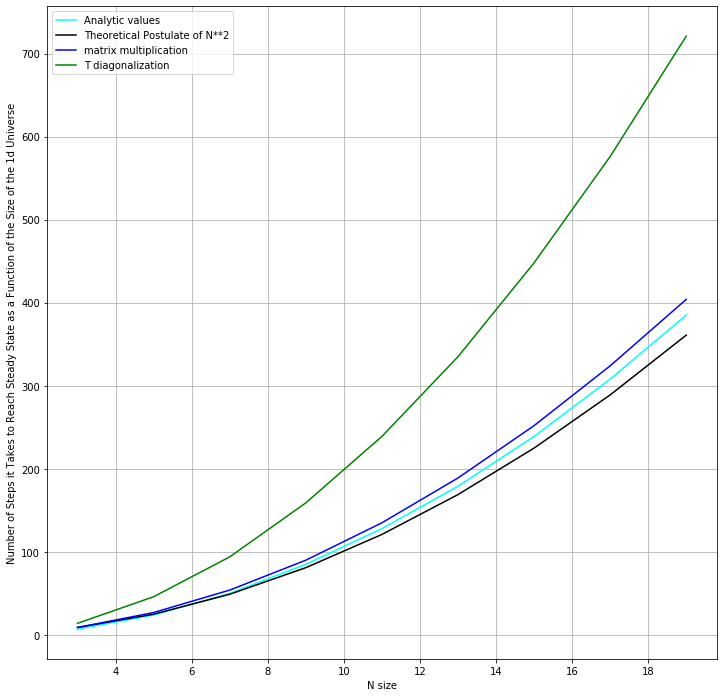

In [25]:
#organize the analytic data

analytic_iteration_counts = []
N = []
for index, steady_state_counts in analytic_vals.items():
    N.append(index)
    analytic_iteration_counts.append(steady_state_counts[0])

N = np.array(N)
theoretical = N**2
# print(N, analytic_iteration_counts)
# print(N,theoretical)
# print(N,T_diag_steady_state_count)
# print(N,iterCount)

legend = ['matrix multiplication','T diagonalization','Theoretical Postulate of N**2', 'Analytic values']

plt.figure(figsize=(12,12))
plt.plot(N, analytic_iteration_counts,color = 'cyan',label = legend[3])
plt.plot(N, theoretical,color = 'black', label = legend[2])
plt.plot(N,iterCount, color = 'blue',label = legend[0])
plt.plot(N,T_diag_steady_state_count, color = 'green',label = legend[1])
plt.legend()
plt.xlabel("N size")
plt.ylabel("Number of Steps it Takes to Reach Steady State as a Function of the Size of the 1d Universe")
plt.grid()
plt.show()

# Discussion


**Problem (20 points):** 

Finally, the $T$ matrix for the 1D random walk can be diagonalized analytically. Suppose we write 
$$p_i=A\cos(kx_i)+B\sin(kx_i).$$


$$ x_i = i  $$ conceptual wise
The values of $A$, $B$, and $k$ are determined (in part!) by satisfying the periodic boundary conditions
$$p_{i+N}=A\cos[k(x_i+Na)]+B\sin[k(x_i+Na)]\equiv p_i,$$
where $a$ is the lattice spacing. Then the action of the transition matrix on the probabilities is
$$Tp_i=\frac{1}{2}\left\{A\cos[k(x_i+a)]+B\sin[k(x_i+a)]+A\cos[k(x_i-a)]+B\sin[k(x_i-a)]\right\}.$$
Using trigonometric identities solves for the eigenvalues, which are functions of $k$. 


Follow the procedure above to obtain the eigenvalues and eigenvectors analytically for the 1D random walk. Check that these match the numerics above. Use these to obtain an estimate of the time needed to reach a steady state as a function of $N$. Interpret your results.

## Our Discussion:

#### Above, we obtained the eigenvalues of the 1D random walk as requested. We can see that those match the eigenvalues from prior steps, as discussed above. For example, here we obtained: 11: 
[128,
  array([ 0.84125353,  0.41541501, -0.14231484, -0.65486073, -0.95949297,
         -0.95949297, -0.65486073, -0.14231484,  0.41541501,  0.84125353,
          1.        ])],
#### While in the numeric step we obtained: 
Index: 11
Eigenvalues: {} [-0.95949297 -0.65486073 -0.14231484  0.41541501  1.          0.84125353
  0.84125353 -0.95949297 -0.65486073 -0.14231484  0.41541501]

#### To get analytic scaling for steady state with regards to number of steps, we utilized the eigenvalue self-multiplication method for this part of the question. We then compared it to all the other ways we did this.

#### **As for scaling with N to get the steady state, as can be see from the graph above; the matrix multiplicative process and analytical process, roughly follow a scale of $N^2$, even if they are a bit above the scale; however the T-diagonalization process takes significantly more time to reach a steady state, even after controlling for all possible epsilons above being 10^(-2). It appears that utilizing analytic values to obtain the number of steps needed to reach steady state is the best method as it approaches the theoretical N^2 line closest. ** 